In [2]:
import pandas as pd

In [3]:
data = {"student": ["Amit", "Bhavna", "Chirag", "Deepa"],
     "marks": [85, 92, 76, 88],
     "passed": [True, True, False, True],
}
df = pd.DataFrame(data)
df

,student,marks,passed
0,Amit,85,True
1,Bhavna,92,True
2,Chirag,76,False
3,Deepa,88,True


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   student  4 non-null      str  
 1   marks    4 non-null      int64
 2   passed   4 non-null      bool 
dtypes: bool(1), int64(1), str(1)
memory usage: 200.0 bytes


In [5]:
df.describe()

,marks
count,4.000000
mean,85.250000
std,6.800735
min,76.000000
25%,82.750000
50%,86.500000
75%,89.000000
max,92.000000


In [6]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.info()
df.describe()
print(f"Dataset shape: {df.shape}")

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    str    
 3   smoker      244 non-null    str    
 4   day         244 non-null    str    
 5   time        244 non-null    str    
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), str(4)
memory usage: 13.5 KB
Dataset shape: (244, 7)


In [8]:
print("Sex distribution:")
print(df["sex"].value_counts())
print("\nDay distribution:")
print(df["day"].value_counts())

Sex distribution:
sex
Male      157
Female     87
Name: count, dtype: int64

Day distribution:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


In [9]:
high_bill = df[df["total_bill"]>30]
print(f"High bills: {len(high_bill)}")
high_bill.head()

High bills: 32


,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
39,31.27,5.00,Male,No,Sat,Dinner,3
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4


In [10]:
grouped_by_day = df.groupby("day")[["total_bill","tip"]].mean()
grouped_by_day

,total_bill,tip
day,,
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132
Thur,17.682742,2.771452


In [11]:
grouped_day_sex = df.groupby(["day","sex"])["tip"].mean()
grouped_day_sex

day   sex   
Fri   Female    2.781111
      Male      2.693000
Sat   Female    2.801786
      Male      3.083898
Sun   Female    3.367222
      Male      3.220345
Thur  Female    2.575625
      Male      2.980333
Name: tip, dtype: float64

In [12]:
groued_by_day_sorted = grouped_by_day.sort_values("tip", ascending=False)
groued_by_day_sorted

,total_bill,tip
day,,
Sun,21.410000,3.255132
Sat,20.441379,2.993103
Thur,17.682742,2.771452
Fri,17.151579,2.734737


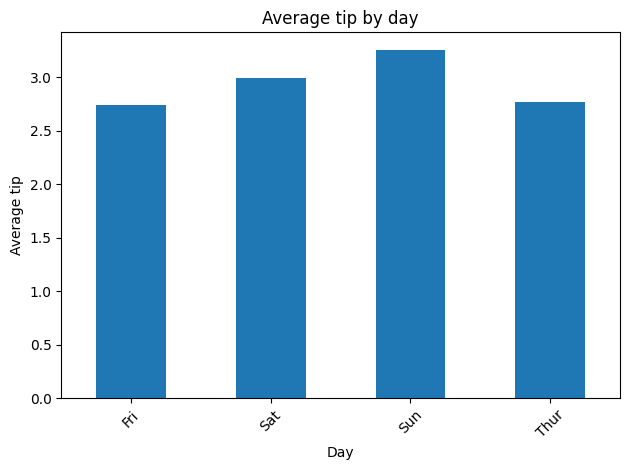

In [13]:
import matplotlib.pyplot as plt
avg_tip_day = df.groupby("day")["tip"].mean()
avg_tip_day.plot(kind = "bar")
plt.title("Average tip by day")
plt.ylabel("Average tip")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
avg_tip_smoker = df.groupby("smoker")["tip"].mean()
avg_tip_smoker

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

On an average smokers tips more.

In [15]:
avg_tip_time = df.groupby("time")["tip"].mean()
avg_tip_time

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

People tip more during Dinner compare to lunch

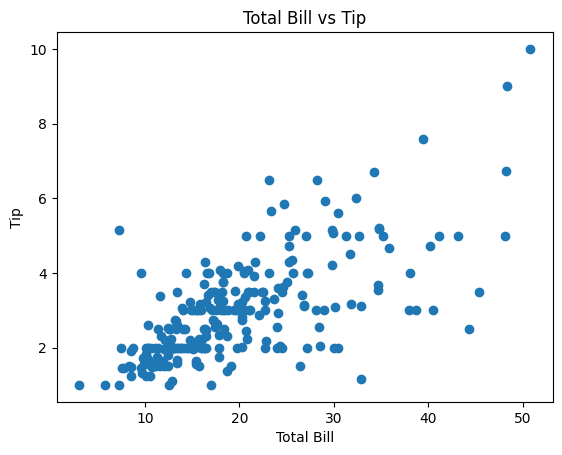

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"], df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

We can say that higher bills tends to higher tip not works every time but propotinality wise bills between 10-20 have good maintained tip value

In [17]:
import numpy as np

tips_array = df[["total_bill", "tip"]].values
print("Pandas -> Numpy:\n", tips_array[:5])
print("Shape:", tips_array.shape)

Pandas -> Numpy:
 [[16.99  1.01]
 [10.34  1.66]
 [21.01  3.5 ]
 [23.68  3.31]
 [24.59  3.61]]
Shape: (244, 2)


In [18]:
bill_tip_ratio = tips_array[:, 0] / tips_array[:, 1]
print("First 5 ratios:", bill_tip_ratio[:5])
generous_mask = bill_tip_ratio < 0.15
print("Generous tippers:", np.sum(generous_mask))

First 5 ratios: [16.82178218  6.22891566  6.00285714  7.15407855  6.81163435]
Generous tippers: 0


In [19]:
df["tip_ratio"] = bill_tip_ratio
print("New column added:")
df[["total_bill", "tip", "tip_ratio"]].head()

New column added:


,total_bill,tip,tip_ratio
0,16.99,1.01,16.821782
1,10.34,1.66,6.228916
2,21.01,3.50,6.002857
3,23.68,3.31,7.154079
4,24.59,3.61,6.811634


In [20]:
high_bill_generous = df[
    (df["total_bill"]>30) &
    (df["tip_ratio"] < 0.15)
]
print("High bill + generous tippers:")
high_bill_generous[["total_bill", "tip", "tip_ratio"]]

High bill + generous tippers:


,total_bill,tip,tip_ratio
